<a href="https://colab.research.google.com/github/SShresth7272/Python-Code/blob/main/Machine_Learning_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Doing Logistic Regression with Numeric type dataframe.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,
    classification_report, confusion_matrix,
    precision_recall_curve, average_precision_score,mean_squared_error, r2_score
)
from sklearn.preprocessing import LabelBinarizer, label_binarize
from sklearn.multiclass import OneVsRestClassifier




from sklearn.svm import SVC




import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Numeric dataset about Car specifications.csv to Numeric dataset about Car specifications.csv


In [2]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Numeric dataset about Car specifications.csv'])).dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4009 non-null   int64  
 1   encoded_brand       4009 non-null   int64  
 2   encoded_model       4009 non-null   int64  
 3   model_year          4009 non-null   int64  
 4   encoded_model_year  4009 non-null   int64  
 5   log10_milage        4009 non-null   float64
 6   encoded_fuel_type   4009 non-null   float64
 7   HP                  4009 non-null   float64
 8   Liters              4009 non-null   float64
 9   Cylinder            4009 non-null   float64
 10  Straight            4009 non-null   float64
 11  Flat                4009 non-null   float64
 12  gear_type           4009 non-null   int64  
 13  transmission_type   4009 non-null   int64  
 14  speed_value         4009 non-null   float64
 15  encoded_ext_col     4009 non-null   int64  
 16  encode

In [5]:
df.head(10)

,Unnamed: 0,encoded_brand,encoded_model,model_year,encoded_model_year,log10_milage,encoded_fuel_type,HP,Liters,Cylinder,Straight,Flat,gear_type,transmission_type,speed_value,encoded_ext_col,encoded_int_col,encoded_accident,log10_price
0,0,33,265,2013,21,4.707570,2.0,300.0,3.7,1.0,0.0,0.0,1,0,6.0,77,40,1.0,4.012837
1,1,12,1053,2021,29,4.540855,3.0,310.0,3.8,0.0,0.0,0.0,1,0,8.0,135,10,1.0,4.579841
2,2,29,1514,2022,30,4.349705,3.0,310.0,3.5,0.0,0.0,0.0,1,0,6.0,69,40,0.0,4.737177
3,3,16,465,2015,23,4.948902,6.0,354.0,3.5,1.0,0.0,0.0,1,0,7.0,77,40,0.0,4.190332
4,4,35,1130,2021,29,3.992774,3.0,310.0,2.0,0.0,0.0,0.0,1,0,8.0,110,40,0.0,4.544056
5,5,20,431,2016,24,5.134805,3.0,310.0,3.5,0.0,0.0,0.0,0,0,6.0,35,2,0.0,4.170203
6,6,35,861,2017,25,4.924279,3.0,292.0,2.0,1.0,0.0,0.0,1,0,6.0,69,40,0.0,4.491362
7,7,34,135,2001,8,5.383815,3.0,282.0,4.4,1.0,0.0,0.0,1,0,6.0,122,16,0.0,3.863323
8,8,29,1305,2021,29,4.369883,3.0,311.0,3.5,1.0,0.0,0.0,1,0,6.0,77,40,0.0,4.622494
9,9,43,1641,2020,28,4.531479,3.0,534.0,3.5,0.0,0.0,0.0,1,0,6.0,77,40,0.0,4.844788


In [7]:
# Assuming df_sel is your DataFrame with selected features
X = df.drop("log10_price", axis=1).values  # Convert to NumPy array
y = df["log10_price"].values.reshape(-1, 1)  # Convert to column vector


In [10]:
# Split the data: 70% Training, 15% Validation, 15% Test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [11]:
def model(X, Y, learning_rate, iteration):
  m=Y.size
  X = np.c_[np.ones(m), X] # add bias term
  theta = np.zeros((X.shape[1],1)) # Initialize theta
  cost_list = []

  for i in range(iteration):
    y_pred = np.dot(X,theta)
    cost = (1 / (2 * m)) * np.sum(np.square(y_pred - Y)) # MSE Cost
    d_theta  = (1/ m) * np.dot(X.T, y_pred - Y) # Gradient equation
    theta = theta - learning_rate * d_theta
    cost_list.append(cost)

    # Add print statements to check for NaN values
    if np.isnan(theta).any():
        print(f"NaN in theta at iteration {i}")
        break
    if np.isnan(cost).any():
        print(f"NaN in cost at iteration {i}")
        break

  return theta, cost_list

In [12]:

# Convert data into NumPy arrays for matrix operations
X_train, y_train = X_train, y_train.reshape(-1, 1)
X_val, y_val = X_val, y_val.reshape(-1, 1)
X_test, y_test = X_test, y_test.reshape(-1, 1)


In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2806, 18)
(2806, 1)
(602, 18)
(602, 1)


In [14]:
# Training the model
learning_rate = 0.00000001  # Adjusted for stability
iterations = 1000
theta, cost_list = model(X_train, y_train, learning_rate, iterations)

In [15]:
# Making predictions
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias term
X_val_bias = np.c_[np.ones(X_val.shape[0]), X_val]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

y_train_pred = np.dot(X_train_bias, theta)
y_val_pred = np.dot(X_val_bias, theta)
y_test_pred = np.dot(X_test_bias, theta)

In [16]:
print(X_train_bias.shape)

(2806, 19)


In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
 #Compute MSE
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(train_mse)
print(val_mse)
print(test_mse)

0.02218193536449531
0.023460348483155823
0.03969654341639038


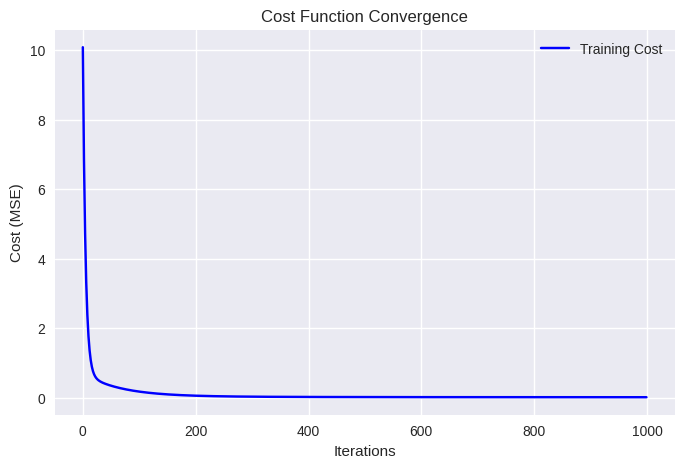

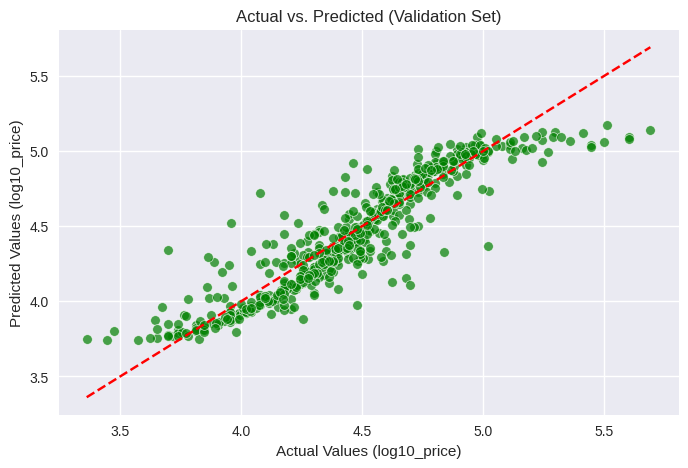

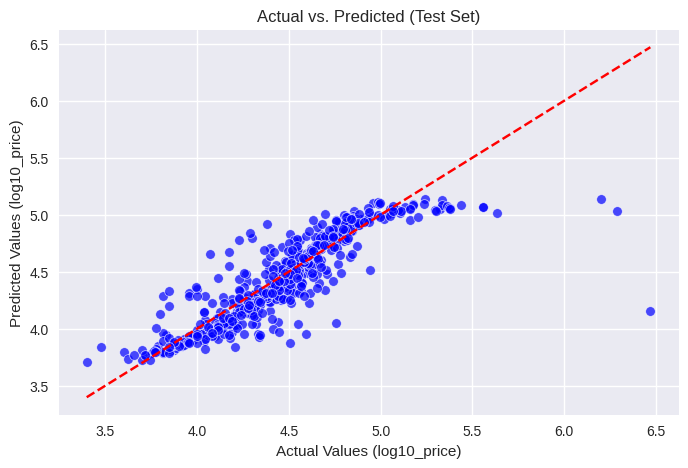

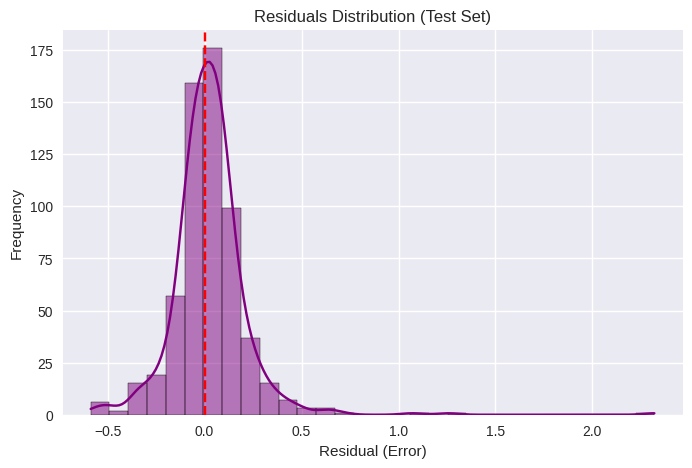

Final Model Parameters (Theta): [9.03061630e-07 1.22609777e-05 2.59241929e-05 6.75853711e-04
 1.82023658e-03 2.08365847e-05 4.04885003e-06 2.84474646e-06
 2.54959297e-04 2.92553569e-06 6.14621602e-07 4.12905178e-08
 2.75709098e-09 8.63786711e-07 2.49672104e-07 5.89388740e-06
 8.37739851e-05 3.88913289e-05 2.08024890e-07]
Training MSE: 0.0222
Validation MSE: 0.0235
Test MSE: 0.0397


In [19]:




# --- VISUALIZATIONS ---

# 1. Plot Cost Function Convergence
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_list, label="Training Cost", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()

# 2. Scatter Plot: Actual vs. Predicted (Validation Set)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val.ravel(), y=y_val_pred.ravel(), color='green', alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--', color='red')  # Perfect Fit Line
plt.xlabel("Actual Values (log10_price)")
plt.ylabel("Predicted Values (log10_price)")
plt.title("Actual vs. Predicted (Validation Set)")
plt.show()

# 3. Scatter Plot: Actual vs. Predicted (Test Set)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test.ravel(), y=y_test_pred.ravel(), color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect Fit Line
plt.xlabel("Actual Values (log10_price)")
plt.ylabel("Predicted Values (log10_price)")
plt.title("Actual vs. Predicted (Test Set)")
plt.show()

# 4. Residuals Histogram (Error Analysis)
residuals = y_test.ravel() - y_test_pred.ravel()
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Test Set)")
plt.show()

# --- PRINT RESULTS ---
print(f"Final Model Parameters (Theta): {theta.ravel()}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")




In [23]:

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function to train Linear Regression using Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, Y, learning_rate, iterations):
    m = Y.size
    X = np.c_[np.ones(m), X]  # Add bias term (Intercept)
    theta = np.zeros((X.shape[1], 1))  # Initialize parameters
    cost_list = []

    for epoch in range(iterations):
        # Perform SGD: iterate over m samples
        for j in range(m):
            index = np.random.randint(0, m)  # Randomly select a sample
            x_i = X[index, :].reshape(1, -1)  # Extract sample features
            y_i = Y[index].reshape(-1, 1)       # Extract corresponding target

            # Compute prediction for the selected sample
            y_pred = np.dot(x_i, theta)

            # Compute the gradient based on this single sample
            d_theta = np.dot(x_i.T, (y_pred - y_i))

            # Update the parameters
            theta = theta - learning_rate * d_theta

        # At the end of each epoch, compute the cost over the entire dataset
        y_pred_full = np.dot(X, theta)
        full_cost = (1 / (2 * m)) * np.sum(np.square(y_pred_full - Y.reshape(-1, 1)))
        cost_list.append(full_cost)

    return theta, cost_list




In [24]:
# Train the model using Stochastic Gradient Descent
learning_rate = 0.0000001  # Higher learning rate due to stochastic nature
iterations = 100  # Number of passes over dataset

theta_final, cost_list = stochastic_gradient_descent(X_train, y_train, learning_rate, iterations)

# Make predictions on the test set
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]  # Add bias term for test data
y_test_pred = np.dot(X_test_bias, theta_final)

# Compute Mean Squared Error
test_mse = mean_squared_error(y_test, y_test_pred)



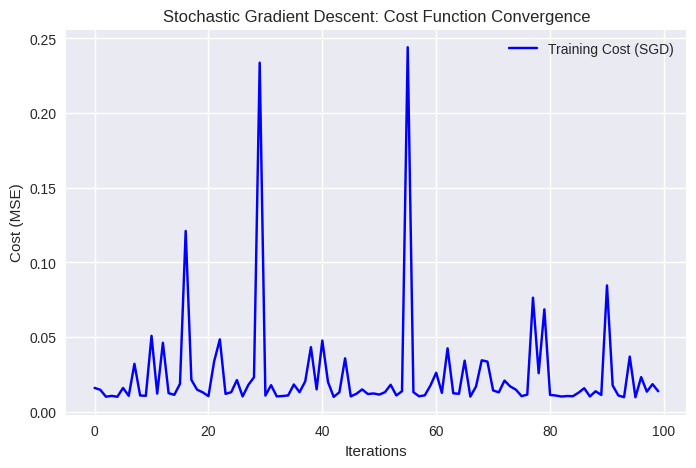

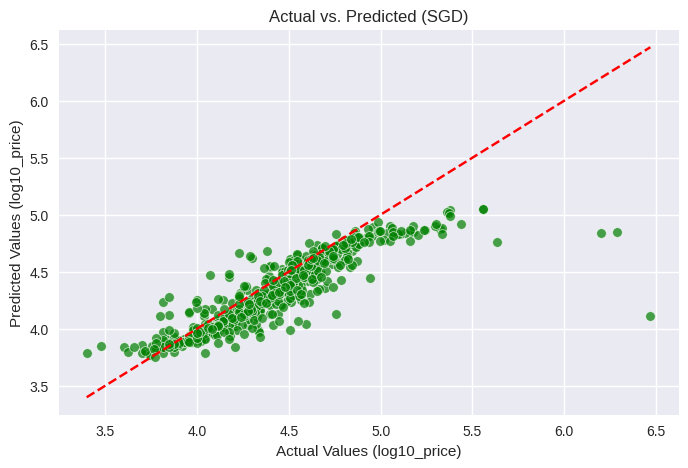


💡 **Stochastic Gradient Descent Results**

Final Model Parameters: [-3.20647389e-07 -2.90108899e-06  1.47858428e-03  4.84441762e-04
  1.81438104e-03  3.43188571e-03 -5.67492285e-04  8.93490085e-05
  1.99952355e-04 -5.29482340e-05 -2.92631177e-05 -1.49748892e-05
  4.63098903e-05 -6.41811935e-06  1.09821991e-04  3.64598509e-04
  2.59027080e-04  9.52701581e-04 -1.31626819e-04]
Final Test MSE: 0.0447


In [25]:
# 1. Plot Cost Function Reduction
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_list)), cost_list, label="Training Cost (SGD)", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Stochastic Gradient Descent: Cost Function Convergence")
plt.legend()
plt.show()

# 2. Scatter Plot: Actual vs. Predicted (Test Set)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test.ravel(), y=y_test_pred.ravel(), color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect Fit Line
plt.xlabel("Actual Values (log10_price)")
plt.ylabel("Predicted Values (log10_price)")
plt.title("Actual vs. Predicted (SGD)")
plt.show()

# --- PRINT FINAL RESULTS ---
print("\n💡 **Stochastic Gradient Descent Results**\n")
print(f"Final Model Parameters: {theta_final.ravel()}")
print(f"Final Test MSE: {test_mse:.4f}")

In [27]:
# 1. Bin the log10_price into categories
# You can adjust the number of bins and the labels as needed
df['price_category'] = pd.qcut(df['log10_price'], q=3, labels=['low', 'medium', 'high'])

# Display the distribution of the new categories
display(df['price_category'].value_counts())

,count
price_category,
low,1339
medium,1335
high,1335


In [28]:
# 2. Prepare data for Logistic Regression
# Use the original features (X) and the new price_category as the target (y_cat)
X_cat = df.drop(["log10_price", "price_category"], axis=1).values
y_cat = df['price_category'].values

# Split the data (using the same split ratios as before for consistency)
X_train_cat, X_temp_cat, y_train_cat, y_temp_cat = train_test_split(X_cat, y_cat, test_size=0.3, random_state=42, stratify=y_cat)
X_val_cat, X_test_cat, y_val_cat, y_test_cat = train_test_split(X_temp_cat, y_temp_cat, test_size=0.5, random_state=42, stratify=y_temp_cat)

print("Shapes of the new categorized data splits:")
print(f"X_train_cat: {X_train_cat.shape}, y_train_cat: {y_train_cat.shape}")
print(f"X_val_cat: {X_val_cat.shape}, y_val_cat: {y_val_cat.shape}")
print(f"X_test_cat: {X_test_cat.shape}, y_test_cat: {y_test_cat.shape}")

Shapes of the new categorized data splits:
X_train_cat: (2806, 18), y_train_cat: (2806,)
X_val_cat: (601, 18), y_val_cat: (601,)
X_test_cat: (602, 18), y_test_cat: (602,)


In [29]:
# 3. Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the model
# Use a solver that can handle multiclass classification (e.g., 'lbfgs', 'newton-cg', 'sag', 'saga')
# Increase max_iter if the model doesn't converge
log_reg_model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
log_reg_model.fit(X_train_cat, y_train_cat)

# 4. Evaluate the model
y_pred_cat = log_reg_model.predict(X_test_cat)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_cat, y_pred_cat))

# Print accuracy score
accuracy_cat = accuracy_score(y_test_cat, y_pred_cat)
print(f"\nAccuracy: {accuracy_cat:.4f}")

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_cat, y_pred_cat))


Classification Report:
              precision    recall  f1-score   support

        high       0.88      0.88      0.88       201
         low       0.92      0.88      0.90       201
      medium       0.78      0.81      0.79       200

    accuracy                           0.86       602
   macro avg       0.86      0.86      0.86       602
weighted avg       0.86      0.86      0.86       602


Accuracy: 0.8555

Confusion Matrix:
[[177   0  24]
 [  2 176  23]
 [ 23  15 162]]
